# 7 微分方程

## 初值问题

初值问题 (initial value problem, IVP) 是给定初始时间 $t_0=0$ 与 状态值 (或向量) $u_0$, 求解状态随时间演变的问题. 状态随着时间演变可以由如下微分方程给出:
$$ \frac{\partial u}{\partial t} = f(t,u) $$
即状态的变化率是时间与当前状态的函数.

### Picard-Lindelöf 定理

若 $f$ 关于  $t$ 连续且关于 $u$ 是  Lipschitz 连续的, 即 $\exists L$, 使得下式成立:
$$\Vert f(t,u_1) - f(t,u_2)\Vert \leqslant L\Vert u_1-u_2\Vert\quad \forall u_1,u_2$$
那么初值问题
$$ \frac{\partial u}{\partial t} = f(t,u) \quad\quad u(0) = u_0$$
存在且有唯一解. 为了方便, 我们以下只考虑这种情况 ($f$ 关于 $t$ 连续且关于 $u$ 是 Lipschitz 连续的).

注: 显然唯一解由 $u(t) = \int_0^t f(\tau,u(\tau))d\tau $ 给出.


### 例子

常见的初值问题 (IVP) 包括:
* 指数增长 / 衰减: $$u'(t) = ru(t)\quad \Rightarrow \quad u(t) = u_0 e^{rt}$$
* Logisitic 模型: $$u'(t)= ru(t) - c(u(t))^2\quad \Rightarrow\quad u(t) = \frac{ru_0}{cu_0+(r-cu_0)e^{-rt}}$$
* 线性系统: $A,u,v$ 可为矩阵
  $$u'(t) = Au(t)+v(t)\quad\Rightarrow\quad u(t) = u_0e^{At}+\int_0^t e^{A(t - \tau)}v(\tau)d\tau$$
* 齐次线性微分方程: 用向量写成线性系统的形式
  $$ \begin{aligned}y^{(n)} &= a_{n-1}y^{(n-1)}+a_{n-2}y^{(n-2)}+\dotsc+a_1y' +a_0y\\ \Leftrightarrow \quad &
  \left[\begin{matrix}y^{(1)}\\y^{(2)}\\\vdots\\y^{(n-1)} \\y^{(n)} \end{matrix}\right]
  =\left[\begin{matrix}  & 1 & &   &  \\ 
    &   & 1 &   &  \\ 
   &   &   & \ddots  &   \\ 
    &   &   &  & 1 \\
  a_0 & a_1 & a_2 & \dotsc & a_{n-1}\end{matrix}\right]\left[\begin{matrix}y\\y^{(1)}\\\vdots \\y^{(n-2)}\\y^{(n-1)} \end{matrix}\right]
  \end{aligned}
  $$
* 阻尼振动: 
  
$$\frac{\partial}{\partial t}\left[\begin{matrix}x\\ v\end{matrix}\right]=\left[\begin{matrix}v\\ a\end{matrix}\right]
=\left[\begin{matrix} 0 & 1\\  -\frac km &-\frac \mu m\end{matrix}\right]\left[\begin{matrix}x\\ v\end{matrix}\right]
$$


## 龙格库塔法

龙格库塔法是求解初值问题的数值方法. 由于是数值问题, 我们只 (近似) 计算 $u(t)$ 在离散的点上的取值. 

即给定数列 $t_0 = 0, t_1,t_2,\dotsc$ 需要求出 $u(t_k)$. 

可以在离散的点上递推, 模拟演变. 先看一些更简单的方法.

### 欧拉法

欧拉法 (Euler method) 是一类特殊的龙格库塔法.  用如下方法递推: 令 $\Delta t = t_{k+1} - t_k$, 

* (前向) 欧拉法 ((Forward) Euler method):
$$u_{k+1} = u_k +  \Delta t\cdot f(t_k,u_k)$$

* 反向欧拉法 (Backward Euler method): (需要解方程)
$$u_{k+1} = u_k + \Delta t\cdot f(t_{k+1},u_{k+1})$$

#### 误差

若 $f$ 关于 $t,u$  Lipschitz 连续, 且 $\Delta t =t_{k+1} - t_k$ 为定值, 则时间 $t$ 的全局误差 (global truncation error, GTE) 是 $O(\Delta t)$ 的.

$$\Vert u_{k+1} - u(t_{k+1})\Vert \leqslant \Vert u_{k+1} -u(t_k) - \Delta t f(t_k,u(t_k) ) \Vert
+   \Vert u(t_{k+1}) -u(t_k) - \Delta t f(t_k,u(t_k) )\Vert $$
其中第一项有
$$ \Vert u_{k+1} -u(t_k) - \Delta t f(t_k,u(t_k) ) \Vert
=\Vert u_k + \Delta tf(t_k, u_k) -u(t_k) - \Delta t f(t_k,u(t_k) ) \Vert
\leqslant (1 + L\Delta t)\Vert u_k - u(t_k)\Vert $$
第二项有
$$\Vert u(t_{k+1}) -u(t_k) - \Delta t f(t_k,u(t_k) )\Vert 
=\Vert \Delta t f(t_{\xi},u(t_{\xi})) - \Delta t f(t_k,u(t_k) )\Vert \leqslant M\Delta t^2$$
故
$$\Vert u_{k+1} - u(t_{k+1})\Vert\leqslant (1 + L\Delta t)\Vert u_k - u(t_k)\Vert+ M\Delta t^2$$
从而
$$\Vert u_k - u(t_k)\Vert\leqslant M\Delta t^2 \cdot \frac{(1 + L\Delta t)^k - 1}{L\Delta t}
\leqslant \frac{M\Delta t}{L}(e^{\Delta tLk} -1)$$

为了求解时间 $t$ 的状态, 采用步长 $\Delta t$ 需要总共递推 $k = \frac{t}{\Delta t}$ 步, 所以
$$ \Vert u_k - u(t_k)\Vert\leqslant \frac{M\Delta t}{L}(e^{Lt} -1) = O(\Delta t)$$



### 梯形法
梯形法 (trapezoidal method) 是一类特殊的龙格库塔法. 
* (隐式) 梯形法 (Implicit trapezoidal method): (需要解方程)
$$u_{k+1} =  u_k + \frac {\Delta t}{2}\cdot \left(f(t_k,u_k)+f(t_{k+1},u_{k+1})\right)$$

* (显式) 梯形法 (Explicit trapezoidal method):
$$u_{k+1} = u_k + \frac{\Delta t}{2}\cdot \left(f(t_k,u_k)+f(t_{k+1}, u_k+\Delta t_k)\right)$$


Forward Euler		Final Error = -0.007380445374485234
Explicit Trapezoid	Final Error = -0.00418960754771458


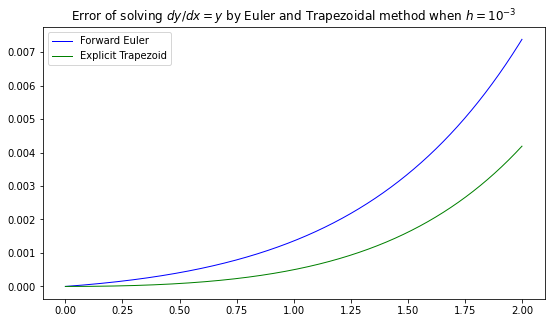

In [106]:
from matplotlib import pyplot as plt 
import numpy as np  
def ForwardEuler(f, u, h, n):
    """Solve u' = f(t, u), u(0)=u and return (n+1) steps with interval h by Forward Euler"""
    us = [u if isinstance(u, float) else u.copy()]
    t = 0
    for i in range(n):
        u += h * f(t, u)
        t += h 
        us.append(u if isinstance(u, float) else u.copy())
    return np.array(us) 
    
def ExplicitTrapezoid(f, u, h, n):
    """Solve u' = f(t, u), u(0)=u and return (n+1) steps with interval h by Explicit Trapezoid"""
    us = [u if isinstance(u, float) else u.copy()]
    t = 0
    for i in range(n):
        u += h * .5 * (f(t, u) + f(t, u + h))
        t += h 
        us.append(u if isinstance(u, float) else u.copy())
    return np.array(us) 

# 用前向欧拉法求解 u' = u 
u = 1.
def f(t, u):
    return u  
h , n = 1e-3, 2000
us = ForwardEuler(f, u, h, n)
us2 = ExplicitTrapezoid(f, u, h, n)
plt.figure(figsize = (9,5))
t = np.linspace(0, h*n, n+1)
plt.plot(t, np.abs(us - np.exp(t)),  c='blue', linewidth=1)
plt.plot(t, np.abs(us2 - np.exp(t)), c='green', linewidth=1)
# plt.plot(t,  np.exp(t), 'r--', linewidth=1)
plt.legend(['Forward Euler', 'Explicit Trapezoid'])
print('Forward Euler\t\tFinal Error =', us[-1]-np.exp(h*n))
print('Explicit Trapezoid\tFinal Error =', us2[-1]-np.exp(h*n))
plt.title('Error of solving $dy/dx=y$ by Euler and Trapezoidal method when $h=10^{%d}$'%round(np.log10(h)))
plt.show()

### 龙格库塔法

上述欧拉法与梯形法都相当于数值积分:
$$\begin{aligned}u(t_{k+1})&= u_k + \int_{t_k}^{t_{k+1}}f(\tau ,u(\tau ))d\tau 
=u_k + \Delta t\int_0^1 f(t_k +r \Delta t,u(t_k + r \Delta t))dr\\ &
\approx u_k+\Delta t \sum_{i=1}^n b_i f(t_k +c_i\Delta t,\ u(t_k +c_i\Delta t))\end{aligned}$$

但是问题在于中间要用到的每个 $ u(t_k +c_i\Delta t)$ 也需要估计:
$$ u(t_k +c_i\Delta t)=u(t_k)+\Delta t\sum_{j=1}^n a_{ij} u(t_k +c_j\Delta t) \quad (i=1,2,\dotsc,n)$$

算法中, $c_i,b_i,a_{ij}$ 均是可以任意指定的参数, 我们写成下列 $(n+1)\times (n+1)$ 的矩阵记号来表示对应的龙格库塔法
$$
\left[\begin{matrix}
c & A\\ 
0 & b^T
\end{matrix}\right]
$$

#### RK4

RK4 是龙格库塔法的常用版本, 对于初值问题 
$$\left\{\begin{aligned} u'(t) &= f(t, u(t)) \\ u(0)&=u_0\end{aligned}\right.$$
令 $h=t_{n+1}-t_n$, 其算法为
$$u_{n+1} = u_n + \frac h6(k_1+2k_2+2k_3+k_4)$$
其中
$$\begin{aligned}k_1 &= f\left(t_n,u_n\right)\\ k_2 &= f\left(t_n+\frac 12h, u_n+\frac 12hk_1\right)\\
k_3 &= f\left(t_n+\frac 12h, u_n+\frac 12hk_2\right)\\ k_4 &= f\left(t_n+h, u_n+hk_3\right)
\end{aligned}$$

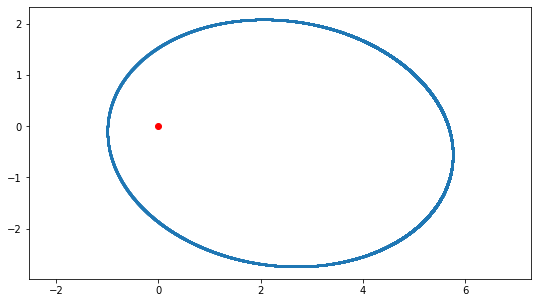

In [79]:
import numpy as np 
def RK4(f, u, h, n):
    """Solve u' = f(t, u), u(0)=u and return (n+1) steps with interval h by RK4"""
    us = [u if isinstance(u, float) else u.copy()]
    t = 0
    for i in range(n):
        k1 = f(t, u)
        k2 = f(t + h*.5, u + h*.5*k1)
        k3 = f(t + h*.5, u + h*.5*k2)
        k4 = f(t + h, u + h*k3)
        u += h/6 * (k1 + 2*(k2 + k3) + k4)
        t += h 
        us.append(u if isinstance(u, float) else u.copy())

    return np.array(us)

# 模拟天体问题: 一个物体绕中心于(0,0)的天体旋转, F = -kr/|r|^3
k = 1
u0 = np.array([3, 2, -.5, .1]).astype('float64') # 四个参数分别为 [x, y, v_x, v_y]
# 注: 引力系数 (k) 太小 或 速度 (u[2],u[3]) 太大会飞出去
def f(t, u): # return [v_x, v_y, a_x, a_y]
    invr3 = np.power(u[0]*u[0]+u[1]*u[1], -1.5)
    return np.array([u[2], u[3], u[0]*(-k)*invr3, u[1]*(-k)*invr3])

track = RK4(f, u0, 2e-2, 50000)
from matplotlib import pyplot as plt 
plt.figure(figsize = (9,5))
plt.scatter(track[:,0], track[:,1], s=1)
plt.scatter([0], [0], c='red')
plt.axis('equal')
plt.show()

## 有限元方法 

有限元方法 (Finite element method) 也是求解微分方程的方法. 